# Final Project

## 1. Scope the Project

Our plan is to use a supervised learning technique to predict which customers are most likely to cancel their subscription using **the past three months of customer data which includes subscription and listening history**.

## 2. Gather Data

Read the following files into Python:
* Customer data: *maven_music_customers.csv*
* Listing history: *maven_music_listening_history.xlsx*

In [427]:
# Read in the data
import pandas as pd
import numpy as np
import seaborn as sns

customer = pd.read_csv("C:/Users/dlrum/Documents/Maven/Python/Data/maven_music_customers.csv")
history = pd.read_excel("C:/Users/dlrum/Documents/Maven/Python/Data/maven_music_listening_history.xlsx")
audio = pd.read_excel("C:/Users/dlrum/Documents/Maven/Python/Data/maven_music_listening_history.xlsx", sheet_name = 1)
session = pd.read_excel("C:/Users/dlrum/Documents/Maven/Python/Data/maven_music_listening_history.xlsx", sheet_name = 2)

In [428]:
customer.dtypes

Customer ID           int64
Customer Name        object
Email                object
Member Since         object
Subscription Plan    object
Subscription Rate    object
Discount?            object
Cancellation Date    object
dtype: object

## 3. Clean Data

### a. Convert Data Types

Check the data types of the data in the tables and convert to numeric and datetime values as necessary.

In [429]:
customer['Customer Name'] = customer['Customer Name'].astype('string')
customer['Email'] = customer['Email'].astype('string')
customer['Member Since'] = pd.to_datetime(customer['Member Since'])
customer['Subscription Plan'] = customer['Subscription Plan'].astype('string')
customer['Subscription Rate'] = (customer['Subscription Rate']
               .str.replace(r'[\$,]', '', regex=True)  # remove $ and commas
               .astype(float))  # convert to numeric
customer['Cancellation Date'] = pd.to_datetime(customer['Cancellation Date'])
customer['Discount?'] = customer['Discount?'].astype('string')
history['Audio Type'] = history['Audio Type'].astype('string')
audio['ID'] = audio['ID'].astype('string')
audio['Name'] = audio['Name'].astype('string')
audio['Genre'] = audio['Genre'].astype('string')

C:\Users\dlrum\AppData\Local\Temp\ipykernel_81176\1148065881.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  customer['Member Since'] = pd.to_datetime(customer['Member Since'])
C:\Users\dlrum\AppData\Local\Temp\ipykernel_81176\1148065881.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  customer['Cancellation Date'] = pd.to_datetime(customer['Cancellation Date'])


### b. Resolve Data Issues

Check for missing data, inconsistent text and typos, duplicate data and outliers.

#### i. Missing Data

In [430]:
# Look for NaN values in the data
customer['Discount?'] = customer['Discount?'].fillna(0)
customer['Discount?'] = np.where(customer['Discount?'] == 'Yes',1,0)
customer['Subscription Plan'] = customer['Subscription Plan'].fillna('Basic (Ads)')
customer['Cancellation Date'] = customer['Cancellation Date'].fillna('Not Cancelled')

#### ii. Inconsistent Text & Typos

In [431]:
customer.describe()

,Customer ID,Member Since,Subscription Rate,Discount?
count,30.000000,30,30.000000,30.000000
mean,6276.333333,2023-04-10 06:24:00,8.556667,0.233333
min,5001.000000,2023-03-13 00:00:00,2.990000,0.000000
25%,5759.500000,2023-03-23 12:00:00,2.990000,0.000000
50%,6196.000000,2023-04-05 12:00:00,2.990000,0.000000
75%,6823.500000,2023-05-01 00:00:00,7.990000,0.000000
max,7583.000000,2023-05-16 00:00:00,99.990000,1.000000
std,814.255587,NaN,17.517840,0.430183


In [432]:
customer[customer['Subscription Rate'] > 50] 
customer.iloc[15,5] = 9.99

In [433]:
audio['Genre'] = audio['Genre'].str.replace('Pop Music','Pop')

In [434]:
audio['Genre'].value_counts()

Genre
Pop           5
Hip Hop       3
Comedy        3
Country       2
Jazz          2
True Crime    2
Name: count, dtype: Int64

#### iii. Duplicate Rows

In [435]:
# Look for duplicate rows
customer[customer.duplicated()]
audio[audio.duplicated()]
history[history.duplicated()]
session[session.duplicated()]

,Session ID,Session Log In Time


#### iv. Outliers

In [436]:
# Look for outliers
customer.describe()

,Customer ID,Member Since,Subscription Rate,Discount?
count,30.000000,30,30.000000,30.000000
mean,6276.333333,2023-04-10 06:24:00,5.556667,0.233333
min,5001.000000,2023-03-13 00:00:00,2.990000,0.000000
25%,5759.500000,2023-03-23 12:00:00,2.990000,0.000000
50%,6196.000000,2023-04-05 12:00:00,2.990000,0.000000
75%,6823.500000,2023-05-01 00:00:00,7.990000,0.000000
max,7583.000000,2023-05-16 00:00:00,9.990000,1.000000
std,814.255587,NaN,3.058998,0.430183


In [437]:
audio.describe()

,Popularity
count,17.000000
mean,21.058824
std,23.381271
min,1.000000
25%,4.000000
50%,10.000000
75%,28.000000
max,80.000000


In [438]:
history.describe()

,Customer ID,Session ID,Audio Order,Audio ID
count,505.000000,505.000000,505.000000,505.000000
mean,6112.247525,105225.554455,4.138614,112.063366
std,832.861221,3625.879577,2.669008,24.670285
min,5001.000000,100520.000000,1.000000,101.000000
25%,5267.000000,101925.000000,2.000000,103.000000
50%,6029.000000,105116.000000,4.000000,105.000000
75%,6822.000000,109654.000000,6.000000,109.000000
max,7583.000000,111333.000000,15.000000,205.000000


In [439]:
session.describe()

,Session ID,Session Log In Time
count,90.000000,90
mean,105619.788889,2023-04-27 08:18:34.000000512
min,100520.000000,2023-03-13 14:14:00
25%,102149.000000,2023-04-05 21:21:30
50%,105390.500000,2023-05-03 20:03:00
75%,109658.250000,2023-05-18 22:17:30
max,111333.000000,2023-05-31 06:03:00
std,3616.208569,NaN


### c. Create New Columns

Create two new columns that will be useful for EDA and modeling:
* Cancelled: whether a customer cancelled or not
* Email: Remove the "Email:" from the email addresses

In [440]:
# Create a 'Cancelled' column
customer['Cancelled?'] = np.where(customer['Cancellation Date'] == 'Not Cancelled', 0, 1)

In [441]:
# Create an updated 'Email' column without the Email: portion
customer['Email'] = customer['Email'].str.split(':').str[1]

In [442]:
customer['Email'] = customer['Email'].str.replace(' ','')

## 4. EDA

Try to better understand the customers who cancelled:
* How long were they members before they cancelled?
* What percentage of customers who cancelled had a discount vs customers who didn't cancel?

In [443]:
# How long were customers members before they cancelled?
customer['duration'] = np.where( 
    customer['Cancelled?'] == 1, 
    (pd.to_datetime(customer['Cancellation Date'], errors = 'coerce') - pd.to_datetime(customer['Member Since'])).dt.days,
    0)

C:\Users\dlrum\AppData\Local\Temp\ipykernel_81176\1723773453.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  (pd.to_datetime(customer['Cancellation Date'], errors = 'coerce') - pd.to_datetime(customer['Member Since'])).dt.days,


In [444]:
# Cancellation rate for those who had a discount
customer.groupby('Discount?')['Cancelled?'].count()

Discount?
0    23
1     7
Name: Cancelled?, dtype: int64

In [445]:
# Cancellation rate for those who did not have a discount

#total cancellations = 13
#7 cancellations without a discount
#6 cancellations with a discount

discounted_cancellation = 7/30
non_discounted_cancellation = 23/30



<Axes: xlabel='Category', ylabel='Cancellation Rate'>

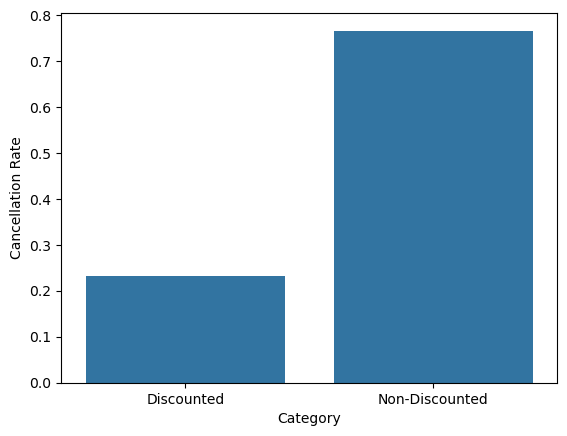

In [446]:
# Visualize the cancellation rate for those with a discount vs those without a discount
comparison_df = pd.DataFrame({
    'Category': ['Discounted', 'Non-Discounted'],
    'Cancellation Rate': [discounted_cancellation, non_discounted_cancellation]
})
sns.barplot(x='Category', y='Cancellation Rate', data=comparison_df)

Better understand the customers' listening histories:
* Join together the listening history and audio tables
* How many listening sessions did each customer have in the past 3 months?
* What were the most popular genres that customers listened to?

In [447]:
# Split the ID in the audio data so the column can be joined with other tables
# The number of listening sessions that each customer had in the past 3 months
audio['ID'] = pd.to_numeric(audio['ID'].str.split('-').str[1])
audio = audio.rename(columns={'ID': 'Audio ID'})
model_df = history.merge(audio, how = 'left')
model_df.groupby('Customer ID')['Session ID'].count()

Customer ID
5001    60
5002    22
5004     9
5267    45
5338    18
5404     8
5581     5
5759    15
5761     5
5763    31
5826    17
5827     7
6029    12
6092    10
6163     4
6229    13
6406     9
6584    27
6586    22
6588    10
6821    21
6822    15
6824    31
7087    11
7158    13
7224    29
7401    11
7579     9
7581    14
7583     2
Name: Session ID, dtype: int64

In [448]:
# The most popular genres that customers listened to
model_df.groupby('Genre')['Popularity'].count().sort_values(ascending = False)

Genre
Pop           267
Hip Hop        88
Country        68
Jazz           48
Comedy         19
True Crime     15
Name: Popularity, dtype: int64

## 5. Prep for Modeling

Create a DataFrame that is ready for modeling with each row representing a customer and the following numeric, non-null columns:
* Customer ID
* Whether a customer cancelled or not
* Whether a customer received a discount or not
* The number of listening sessions
* Percent of listening history consisting of Pop
* Percent of listening history consisting of Podcasts

In [449]:
# Create a dataframe ready for modeling

model_df = model_df.groupby('Customer ID').agg(
    listening_sessions =('Session ID', 'nunique'),
    pct_podcast=('Audio Type', lambda s: 100 * (s.str.lower().eq('podcast').mean())),
    pct_pop=('Genre', lambda s: 100 * (s.str.lower().eq('pop').mean()))
)

model_df = model_df.merge(customer, how = 'left', left_on = 'Customer ID', right_on = 'Customer ID')
model_df = model_df[['Customer ID','Cancelled?','Discount?','listening_sessions','pct_pop','pct_podcast']]
model_df.head()

,Customer ID,Cancelled?,Discount?,listening_sessions,pct_pop,pct_podcast
0,5001,0,0,8,56.666667,0.0
1,5002,0,0,4,0.000000,0.0
2,5004,1,0,1,100.000000,0.0
3,5267,0,0,7,51.111111,0.0
4,5338,0,0,4,0.000000,0.0


Visualize the relationships in the modeling DataFrame using a pair plot:
* What are some of your observations?
* What variables might do a good job predicting customer cancellation?

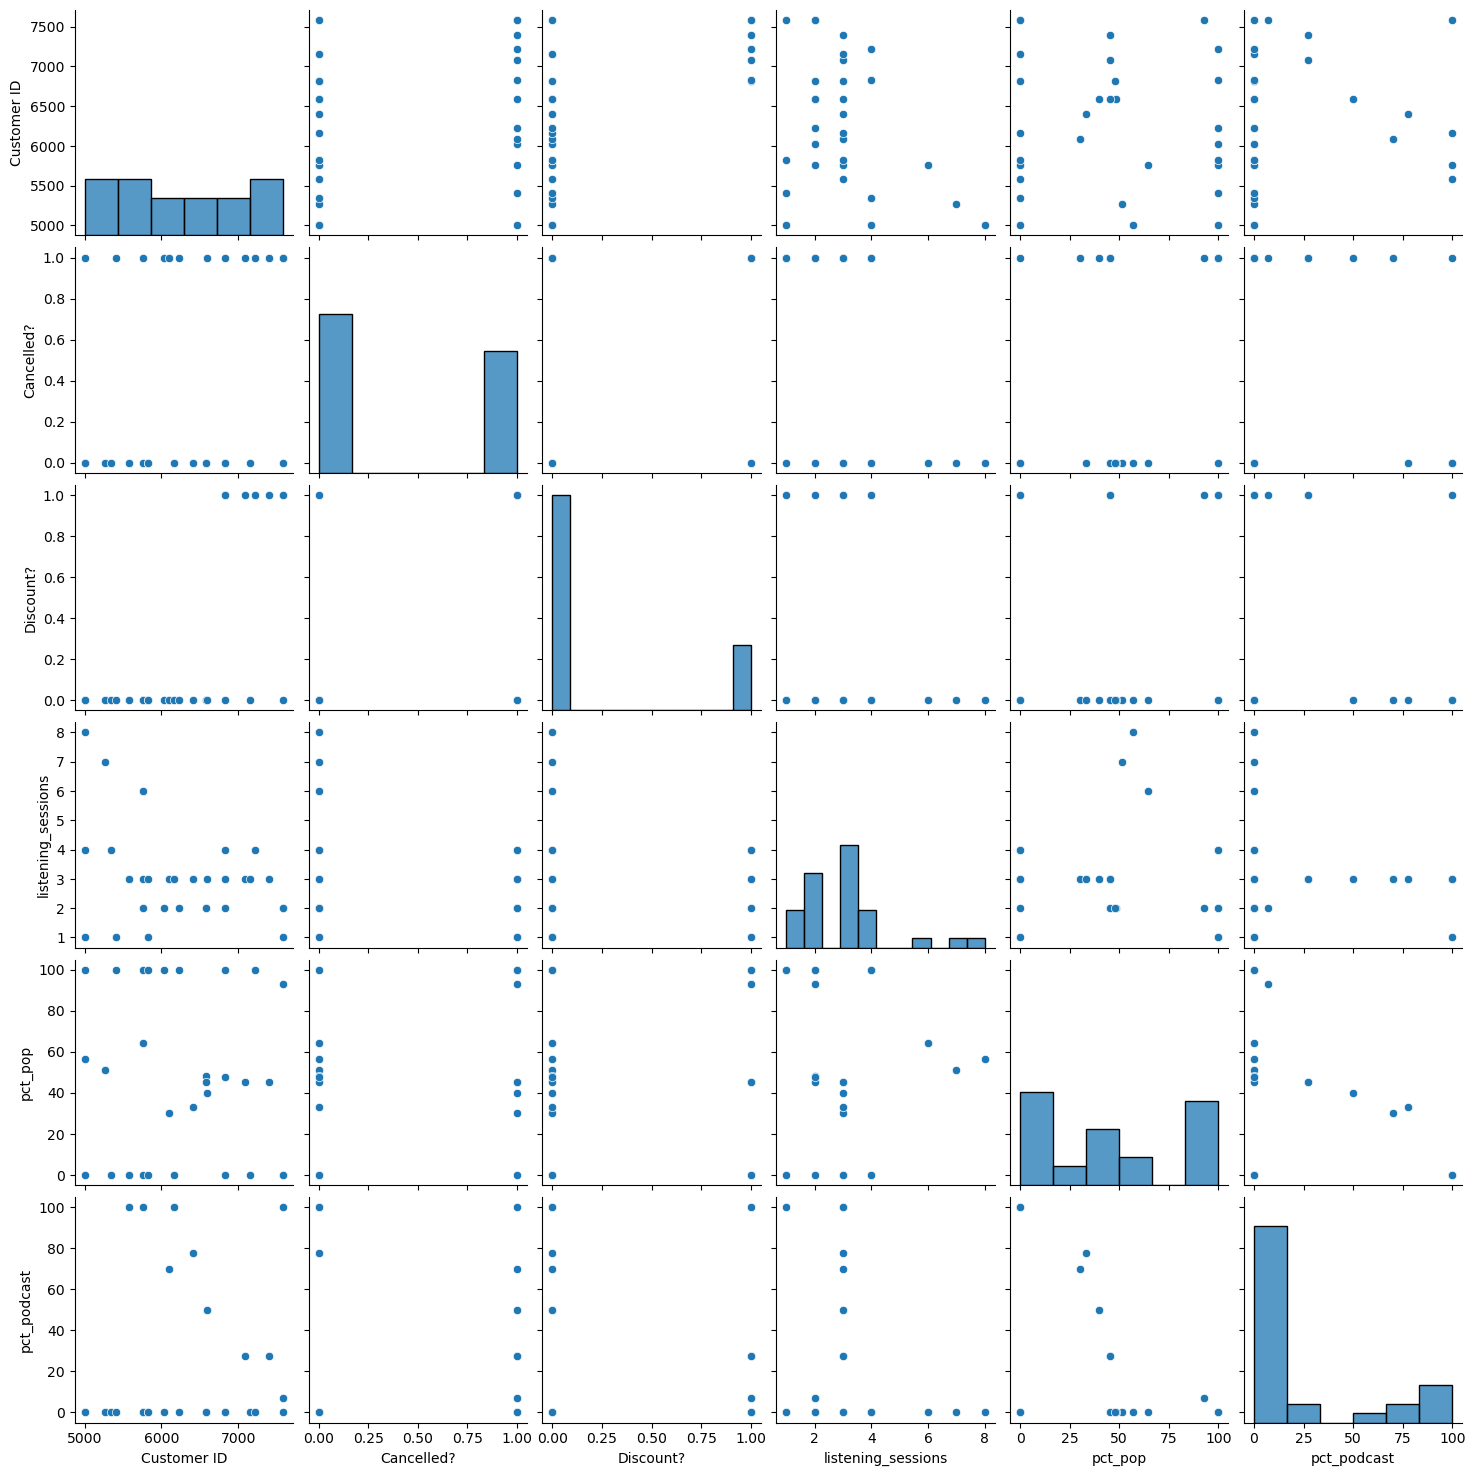

In [450]:
sns.pairplot(model_df)

In [452]:
#podcasts and pop listening are somewhat negatively correlated. People who listen to more podcasts listen to less pop
#customers averaged mostly the same amount of listening sessions, with only a couple exceeding 4 sessions
#customers with a higher discount were modestly less likely to cancel, but would need more data to confirm this trend.
#number of listening sessions is skewed right
# more listening sessions correlated to a lower cancellation rate
#higher pop listening correlated to higher cancellation rates
model_df.corr()

,Customer ID,Cancelled?,Discount?,listening_sessions,pct_pop,pct_podcast
Customer ID,1.000000,0.269942,0.648514,-0.337083,-0.076129,0.082884
Cancelled?,0.269942,1.000000,0.471825,-0.333739,0.585630,-0.007471
Discount?,0.648514,0.471825,1.000000,-0.048877,0.112675,0.016760
listening_sessions,-0.337083,-0.333739,-0.048877,1.000000,-0.131156,-0.116558
pct_pop,-0.076129,0.585630,0.112675,-0.131156,1.000000,-0.477212
pct_podcast,0.082884,-0.007471,0.016760,-0.116558,-0.477212,1.000000
